In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
# %matplotlib widget
# aka import ipympl
xyz = np.load("./motions/a_person_celebrating.npy")
%matplotlib notebook


In [2]:
# skel = xyz[0]
torso = np.stack([xyz[:,0,:], xyz[:,9,:], xyz[:,13,:],xyz[:,14,:],xyz[:,9,:]],1)


<IPython.core.display.Javascript object>


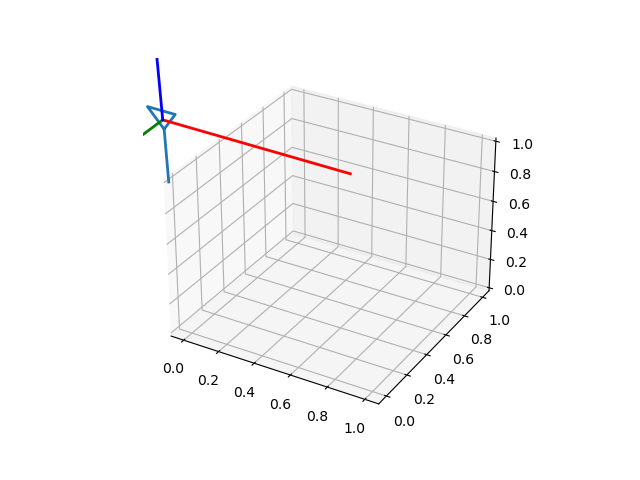

In [8]:


# Extract the x, y, and z coordinates of the torso points
x = torso[0]
y = torso[1]
z = torso[2]

def get_quaternion_from_points(points):
    x_axis = points[1]-points[2]
    y_axis = np.cross(points[2]-points[1], points[2]-points[0])
    z_axis = np.cross(x_axis,y_axis)
    axes = [axis/np.linalg.norm(axis) for axis in [x_axis, y_axis, z_axis]]
    q = get_quaterion_from_R(np.stack(axes,axis=1))
    return q
    

def get_quaterion_from_R(R_matrix):
    rot = R.from_matrix(R_matrix)
    return rot.as_quat()

def get_rotation_matrix_from_quaternion(quaternion):

    matrix = np.array([
        [quaternion[0]**2 + quaternion[1]**2 - quaternion[2]**2 - quaternion[3]**2,
         quaternion[0]*quaternion[1] - quaternion[2]*quaternion[3],
         quaternion[0]*quaternion[1] + quaternion[2]*quaternion[3],
         -quaternion[1]*quaternion[2] + quaternion[0]*quaternion[3]],
        [quaternion[0]*quaternion[2] + quaternion[2]*quaternion[3],
         quaternion[0]*quaternion[3] - quaternion[2]*quaternion[1],
         quaternion[1]*quaternion[2] + quaternion[0]*quaternion[3],
         quaternion[2]*quaternion[3] - quaternion[0]*quaternion[1]],
        [-quaternion[1]*quaternion[0] - quaternion[0]*quaternion[1],
         quaternion[1]*quaternion[0] + quaternion[0]*quaternion[1],
         quaternion[2]*quaternion[0] - quaternion[0]*quaternion[2],
         quaternion[3]*quaternion[0] + quaternion[0]*quaternion[3]],
        ])

    return matrix

def get_axis_lines(origin, orientation):
    Rot = R.from_quat(orientation)
    matrix = Rot.as_matrix()
#     R = np.eye(3)
    x = np.stack([origin,matrix[:,0]+origin]).T
    y = np.stack([origin,matrix[:,1]+origin]).T
    z = np.stack([origin,matrix[:,2]+origin]).T
    return x, y, z
    
# Create a 3D plot of the torso triangle over time
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.set(xlim3d=(-1, 1), xlabel='X')
# ax.set(ylim3d=(-0.2, 0.2), ylabel='Y')
# ax.set(zlim3d=(1, 1.5), zlabel='Z')
triangle, = ax.plot([],[],[] , linewidth=2)
torso_axis_x, = ax.plot([],[],[],c='r',linewidth=2)
torso_axis_y, = ax.plot([],[],[],c='g',linewidth=2)
torso_axis_z, = ax.plot([],[],[],c='b',linewidth=2)
axes = [torso_axis_x,torso_axis_y, torso_axis_z]
# Set the line's animation parameters
# triangle.set_animated(True)



# # # Define the animation function
def animate(i,triangle,axes):
#     triange.set_data([2,3], [1,1], [2,2])
#     line.set_data(torso[i,:,0], torso[i,:,1],torso[i,:,2])
#     print(i)
    triangle.set_data(torso[i,:,0],torso[i,:,2])
    triangle.set_3d_properties(torso[i,:,1])
    
    origin = np.mean(torso[i,1:,:],0)
#     origin = torso[i,0]
    q = get_quaternion_from_points([torso[i,1], torso[i,2], torso[i,3]])
    new_lines = get_axis_lines(origin,np.array(q))
    print(axes)
    for axis,new in zip(axes,new_lines):
        axis.set_data(new[0],new[2])
        axis.set_3d_properties(new[1])
#     torso_axis_x.set_data(x[0],x[1])
#     torso_axis_x.set_3d_properties(x[2])
#     torso_axis_y.set_data(y[0],y[1])
#     torso_axis_y.set_3d_properties(y[2])
#     torso_axis_z.set_data(z[0],z[1])
#     torso_axis_z.set_3d_properties(z[2])
    
    return triangle,axes#,torso_axis_x, torso_axis_y, torso_axis_z

# # Create the animation
ani = animation.FuncAnimation(fig, animate, frames=100,fargs=(triangle, axes), interval=50)

# Show the animation
plt.show()

In [7]:
get_quaternion_from_points([torso[0,1], torso[0,2], torso[0,3]])

[<mpl_toolkits.mplot3d.art3d.Line3D object at 0x7efc2d53fe10>, <mpl_toolkits.mplot3d.art3d.Line3D object at 0x7efc2c0bee10>, <mpl_toolkits.mplot3d.art3d.Line3D object at 0x7efc2c0be710>]


array([-0.70584551, -0.04425565, -0.01267153,  0.70686844])

In [161]:
axes

<IPython.core.display.Javascript object>


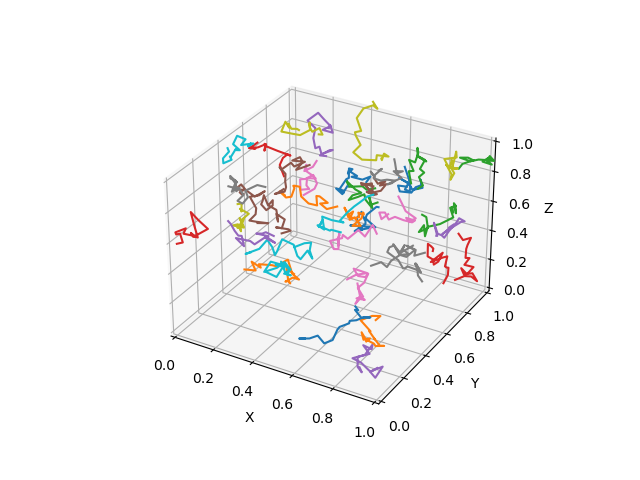

In [70]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


def random_walk(num_steps, max_step=0.05):
    """Return a 3D random walk as (num_steps, 3) array."""
    start_pos = np.random.random(3)
    steps = np.random.uniform(-max_step, max_step, size=(num_steps, 3))
    walk = start_pos + np.cumsum(steps, axis=0)
    return walk


def update_lines(num, walks, lines):
    print(num)
    for line, walk in zip(lines, walks):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(walk[:num, :2].T)
        line.set_3d_properties(walk[:num, 2])
    return lines


# Data: 40 random walks as (num_steps, 3) arrays
num_steps = 30
walks = [random_walk(num_steps) for index in range(40)]

# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# Create lines initially without data
lines = [ax.plot([], [], [])[0] for _ in walks]

# Setting the axes properties
ax.set(xlim3d=(0, 1), xlabel='X')
ax.set(ylim3d=(0, 1), ylabel='Y')
ax.set(zlim3d=(0, 1), zlabel='Z')

# Creating the Animation object
ani = animation.FuncAnimation(
    fig, update_lines, num_steps, fargs=(walks, lines), interval=100)

plt.show()